In [43]:
import gravipy as gp
import glob
from astropy.io import fits
import numpy as np

In [44]:
files = sorted(glob.glob('/data/user/forFrank2/2022-08-16/reduced_PL20220728/poscor_nometcor/calibrated_S2/calibrated/*dualsciviscalibrated.fits'))
files = [_ for _ in files if fits.open(_)[0].header['ESO INS SOBJ OFFX'] == 0]

In [45]:
f = files[0]
date = fits.open(f)[0].header['DATE-OBS']

In [46]:
f

'/data/user/forFrank2/2022-08-16/reduced_PL20220728/poscor_nometcor/calibrated_S2/calibrated/GRAVI.2022-08-17T00:08:55.346_dualscivis_science_dualsciviscalibrated.fits'

# find star positions

In [4]:
o = gp.GCorbits()

Stars with orbits:
['S1', 'S2', 'S4', 'S8', 'S9', 'S12', 'S13', 'S14', 'S17', 'S18', 'S19', 'S21', 'S23', 'S24', 'S29', 'S31', 'S33', 'S38', 'S42', 'S55', 'S60', 'S66', 'S67', 'S71', 'S83', 'S85', 'S87', 'S89', 'S91', 'S96', 'S97', 'S145', 'S175', 'R34', 'R44']

Stars with proper motions:
['S7', 'S10', 'S11', 'S20', 'S22', 'S25', 'S26', 'S27', 'S30', 'S32', 'S34', 'S35', 'S36', 'S37', 'S41', 'S43', 'S45', 'S46', 'S47', 'S50', 'S51', 'S52', 'S53', 'S56', 'S57', 'S59', 'S62', 'S63', 'S65', 'S68', 'S95', 'S300', 'S5', 'S6', 'S28', 'S39', 'S44', 'S48', 'S58', 'S64', 'S82']


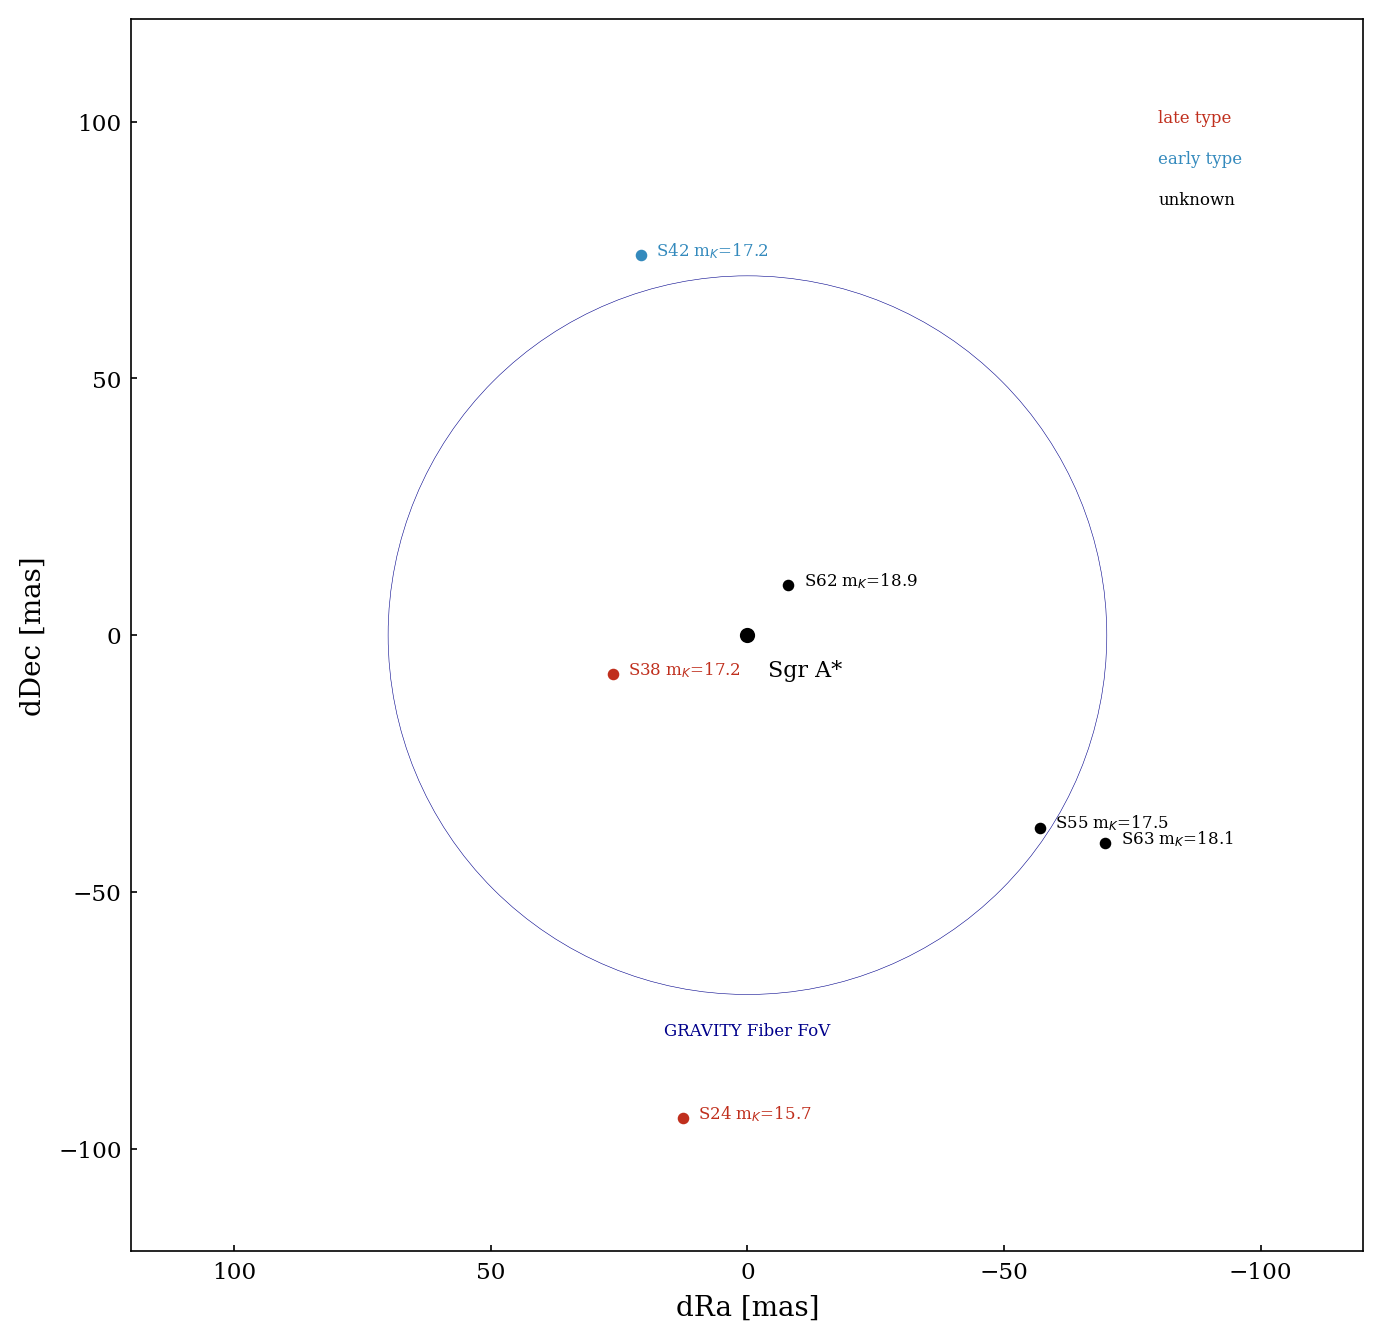

In [5]:
o.plot_orbits(t=date, long=True)

**-> S38, S55 and S62 in the field**

In [6]:
t = gp.convert_date(date)[0]

# get positions
s38 = o.pos_orbit('S38', t)*1e3
s55 = o.pos_orbit('S55', t)*1e3
s62 = o.pos_pm('S62', t)*1e3

# get flux ratios, always relative to brightest star in field (here: S38)
s62s38 = 10**(-0.4*(o.star_pms['S62']['Kmag'] - o.star_orbits['S38']['Kmag']))
s55s38 = 10**(-0.4*(o.star_orbits['S55']['Kmag'] - o.star_orbits['S38']['Kmag']))

# Fitting

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|██████████████████████████████████████████████████████████████████| 301/301 [02:33<00:00,  1.96it/s]

---------------------------------------
Mean acceptance fraction: 0.38
---------------------------------------


ndof: 47
red. chi2 for visamp: 1.68
red. chi2 for vis2: 1.59
red. chi2 for visphi: 2.45
red. chi2 for closure: 2.26


-----------------------------------
Best chi2 result:
dRA1 = 25.753
dDEC1 = -5.916
dRA2 = -53.437
dDEC2 = -37.663
fr2 = 0.070
fr3 = -2.903
alpha BH = -0.953
f BG = 2.257
pc RA = 0.110
pc Dec = 0.277
fr BH = 0.007


MCMC Result:
dRA1 = 25.779 + 0.053 - 0.045
dDEC1 = -5.953 + 0.043 - 0.048
dRA2 = -55.859 + 1.411 - 1.416
dDEC2 = -37.409 + 0.849 - 1.723
fr2 = -0.999 + 0.767 - 1.063
fr3 = -2.525 + 0.332 - 0.315
alpha BH = -1.684 + 0.715 - 1.694
f BG = 2.278 + 0.093 - 0.122
pc RA = 0.096 + 0.037 - 0.038
pc Dec = 0.265 + 0.051 - 0.048
fr BH = -0.018 + 0.019 - 0.031
-----------------------------------
Run MCMC for Pol 2



/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1823: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|██████████████████████████████████████████████████████████████████| 301/301 [02:38<00:00,  1.89it/s]
/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1823: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.39
---------------------------------------


ndof: 48
red. chi2 for visamp: 2.80
red. chi2 for vis2: 2.59
red. chi2 for visphi: 3.28
red. chi2 for closure: 5.78


-----------------------------------
Best chi2 result:
dRA1 = 25.526
dDEC1 = -5.823
dRA2 = -54.937
dDEC2 = -38.242
fr2 = -2.808
fr3 = -2.044
alpha BH = -1.014
f BG = 1.714
pc RA = 0.056
pc Dec = 0.227
fr BH = -0.096


MCMC Result:
dRA1 = 25.547 + 0.034 - 0.032
dDEC1 = -5.885 + 0.043 - 0.051
dRA2 = -56.859 + 1.099 - 1.983
dDEC2 = -38.896 + 1.282 - 2.241
fr2 = -1.154 + 0.495 - 0.813
fr3 = -1.501 + 0.217 - 0.250
alpha BH = -2.521 + 0.992 - 1.744
f BG = 1.746 + 0.066 - 0.077
pc RA = 0.082 + 0.042 - 0.043
pc Dec = 0.209 + 0.058 - 0.058
fr BH = -0.102 + 0.017 - 0.028
-----------------------------------


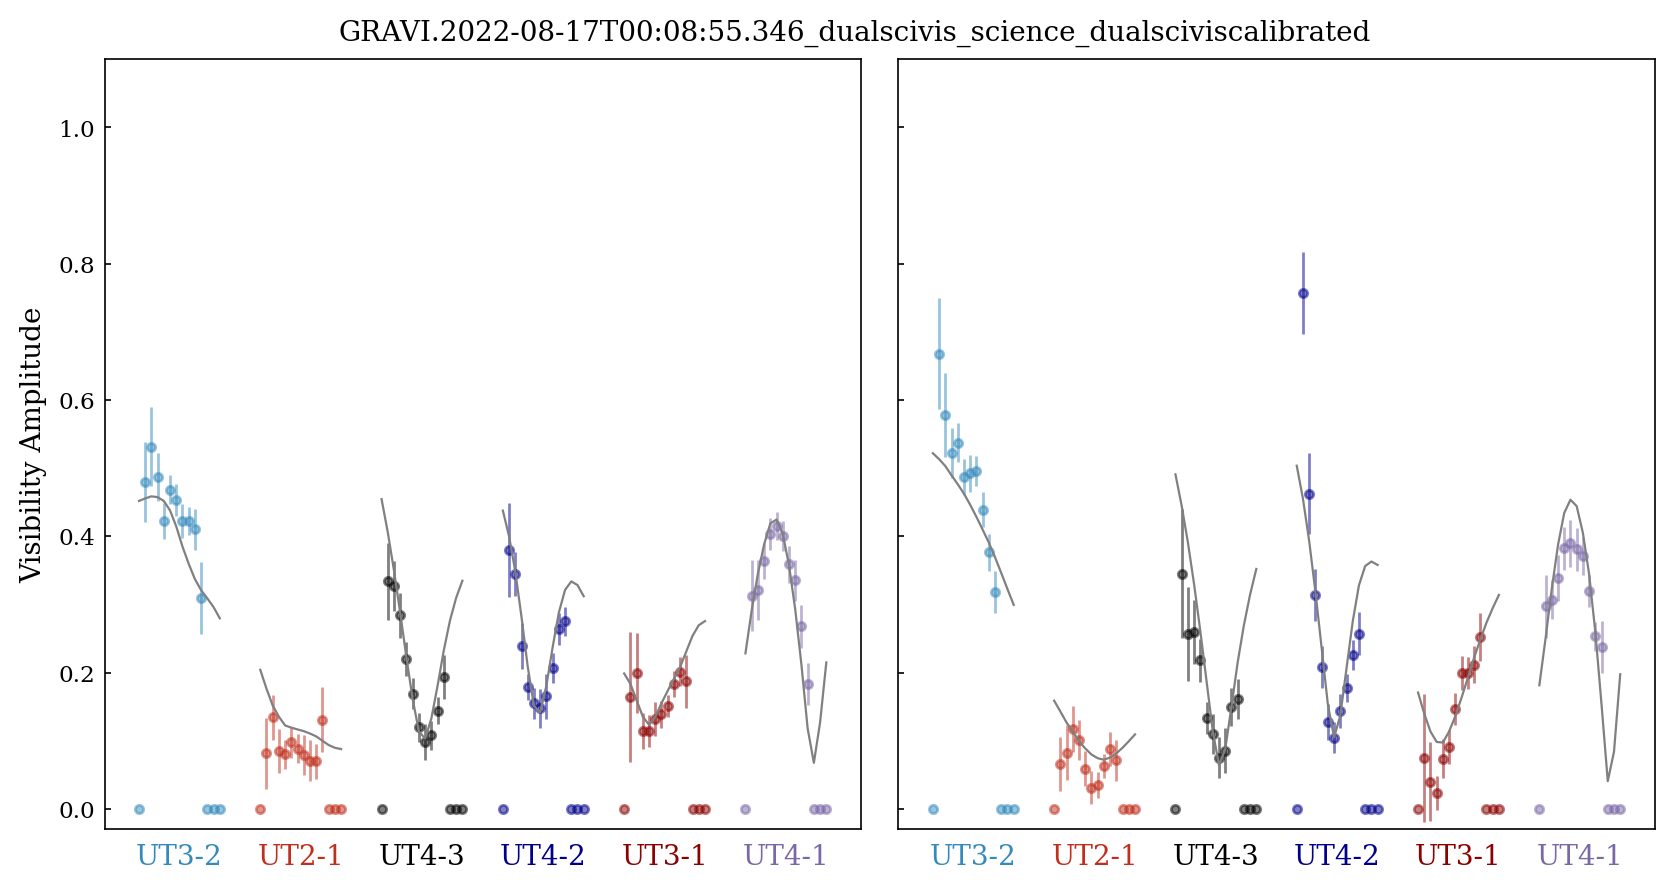

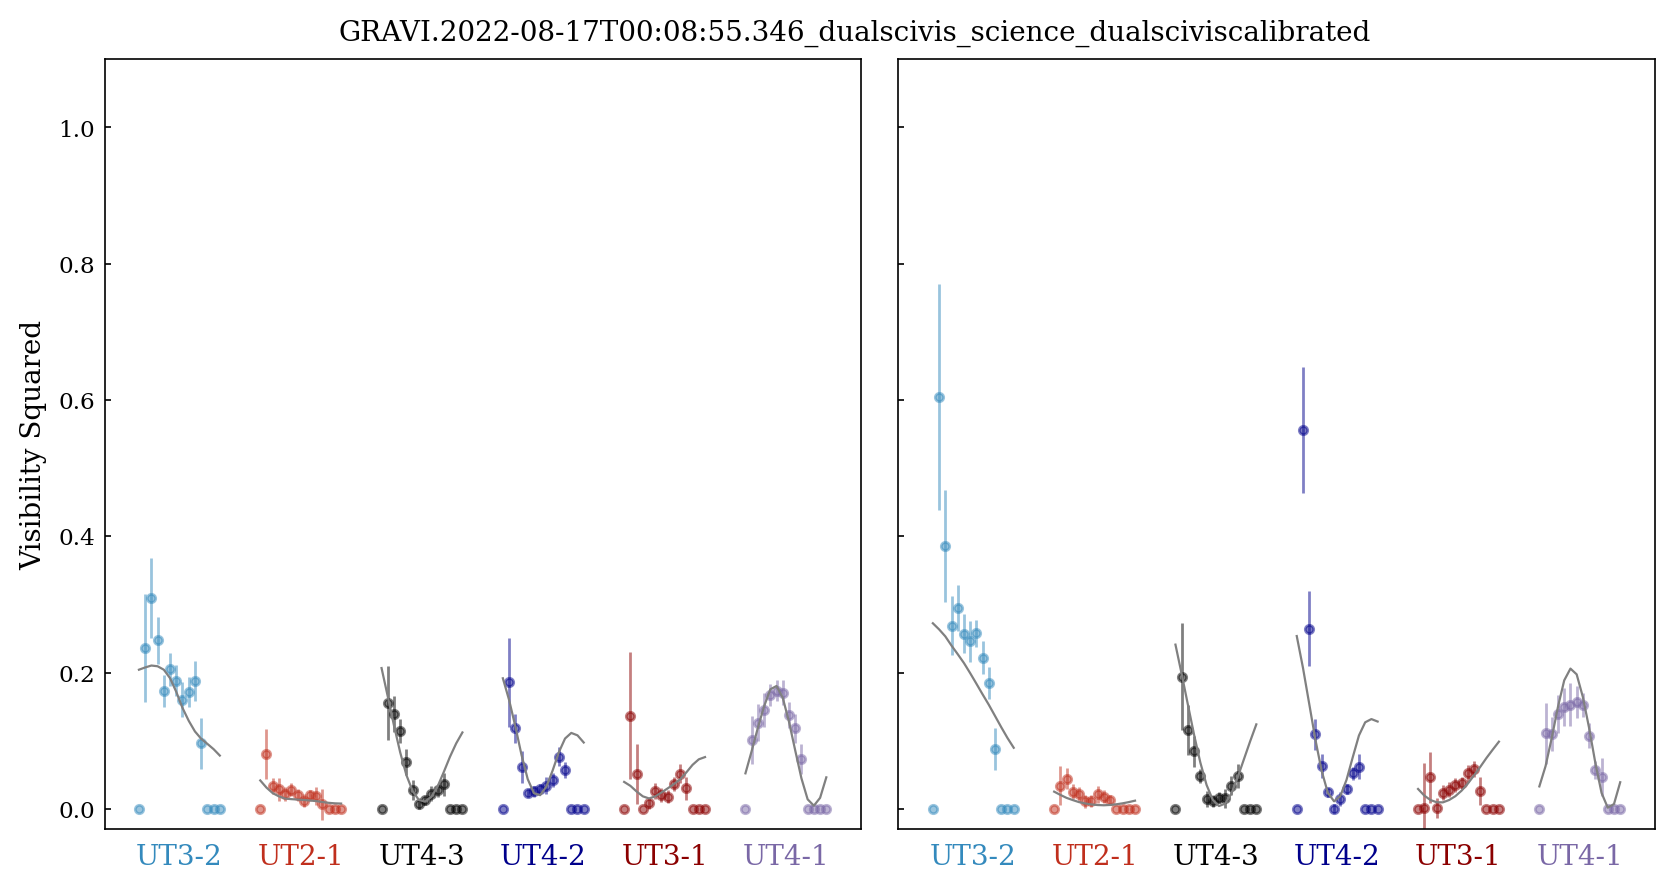

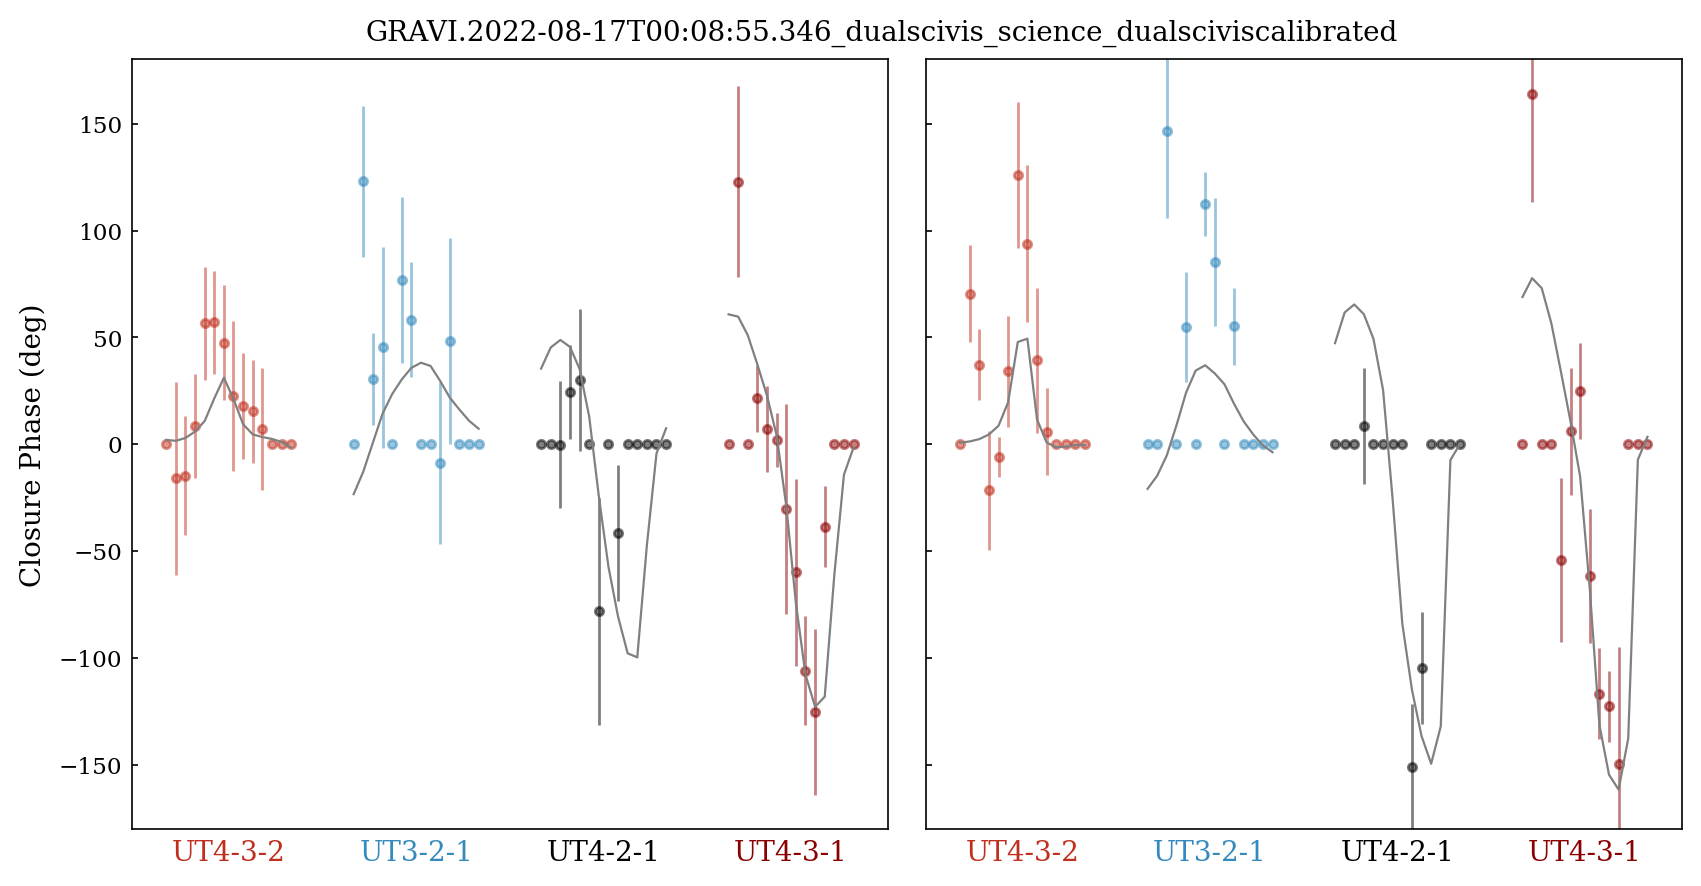

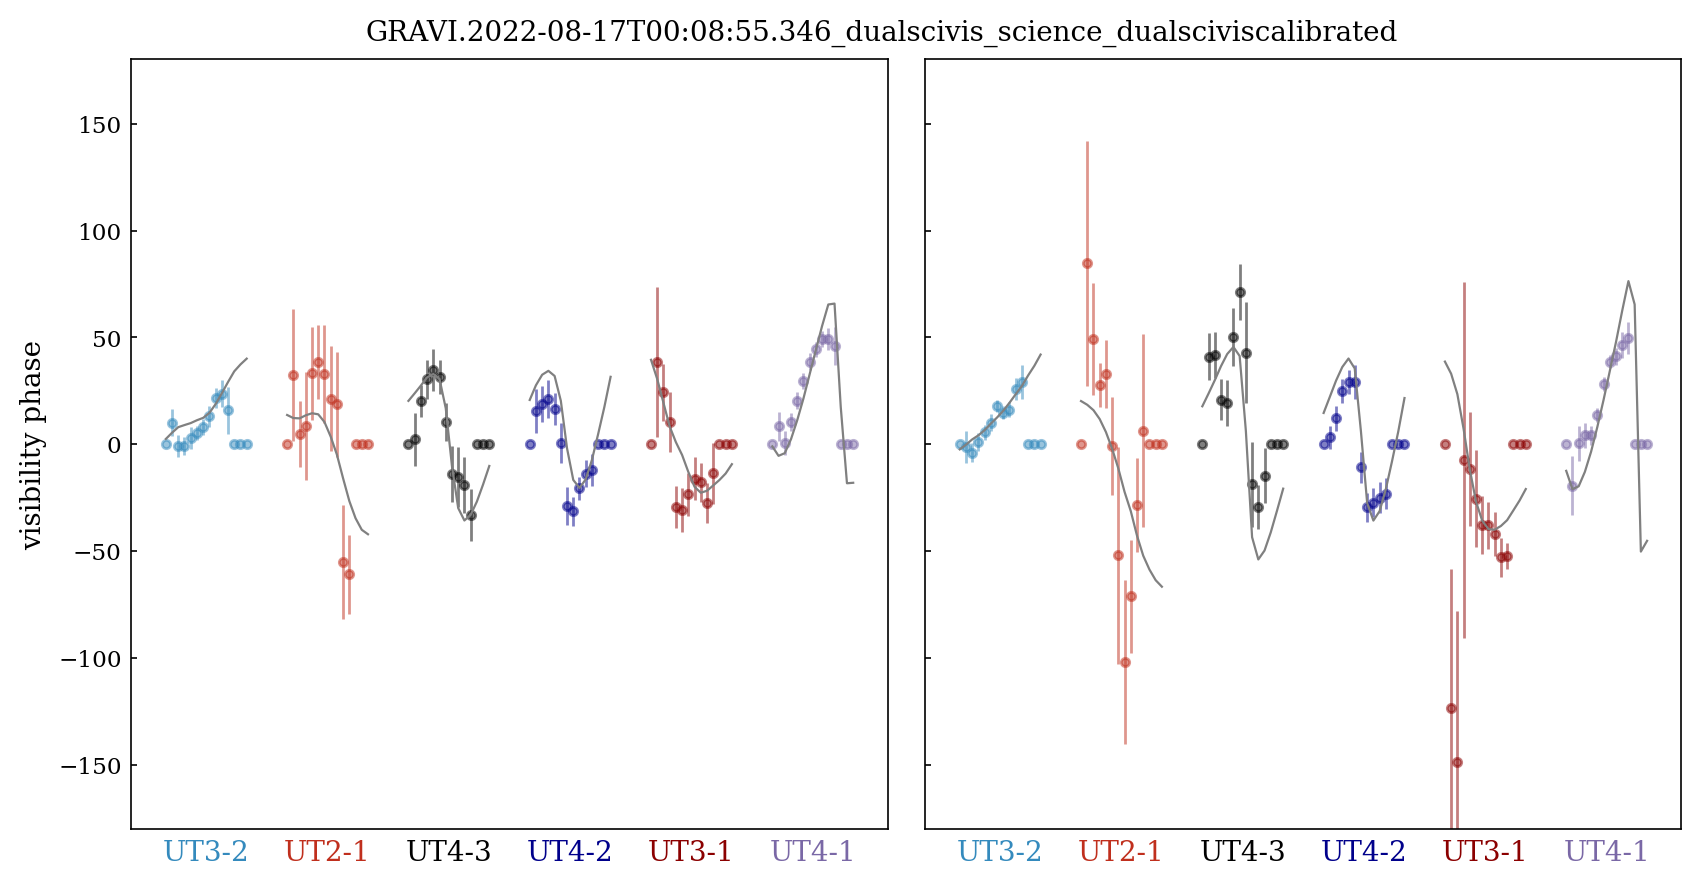

Combined red. chi2 of fitted data: 22.421


[array([ 2.57528734e+01, -5.91590537e+00, -5.34367390e+01, -3.76632195e+01,
         6.97193329e-02, -2.90338355e+00, -9.53049116e-01,  2.25718592e+00,
         1.09537669e-01,  2.77173282e-01,  6.55499730e-03]),
 array([ 25.52590604,  -5.82318769, -54.93736045, -38.24176904,
         -2.80810459,  -2.04388969,  -1.01443124,   1.71427911,
          0.05581792,   0.22728047,  -0.09551575])]

In [7]:
star_pos_ra = [s38[0], s55[0], s62[0]]  # list of RA of stars
star_pos_de = [s38[1], s55[1], s62[1]]  # list of Dec of stars
star_flux_ratio = [s55s38, s62s38]      # list of flux ratios relativ to first star, 1 shorter than other lists

fi = gp.GravMFit(f)
fi.fit_stars(
    star_pos_ra,
    star_pos_de,
    star_flux_ratio,
    fit_pos=[True, True, False], # S62 is usually too faint to fit the position
    fit_for=[1,1,1,1], # fitting for all quantities here: VisAmp, V2, Closure Phase, & Visibility Phase
    nthreads=4,
    nwalkers=201,
    nruns=301,
    initial=[-4, 1,    # initial conditions for: alpha SgrA*, background flux ratio
             0, 0,     # initial conditions for: Phase center Ra, Dec
             0.5 , 1], # initial conditions for: background central/primary source, coherence loss
    plotScience=True)

In [18]:
# Results
# Columns are:
# 0 inpur P1, 1: most likely solution P1, 2: most prob. solution P1, 3 & 4: +- 1 sigma
# 5-9 same for P2
# not fitted values have an error of 0
fi.fittab

,column,dRA1,dDEC1,dRA2,dDEC2,fr2,dRA3,dDEC3,fr3,alpha BH,...,pc RA,pc Dec,fr BH,CL1,CL2,CL3,CL4,CL5,CL6,chi2
0,in P0_0,26.276986,-7.621966,-56.935556,-37.553068,-0.144294,-7.95739,9.77151,-0.674797,-4.000000,...,0.000000,0.000000,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,1.676446
1,M.L. P0_0,25.752873,-5.915905,-53.436739,-37.663219,0.069719,-7.95739,9.77151,-2.903384,-0.953049,...,0.109538,0.277173,0.006555,1.0,1.0,1.0,1.0,1.0,1.0,1.589416
2,M.P. P0_0,25.779347,-5.952665,-55.858851,-37.409208,-0.999319,-7.95739,9.77151,-2.525365,-1.684093,...,0.096270,0.265022,-0.017567,1.0,1.0,1.0,1.0,1.0,1.0,2.255016
3,$-\sigma$ P0_0,0.045095,0.047664,1.415954,1.723189,1.063101,0.00000,0.00000,0.315177,1.693887,...,0.038083,0.047753,0.031472,0.0,0.0,0.0,0.0,0.0,0.0,2.449284
4,$+\sigma$ P0_0,0.052567,0.042631,1.411406,0.848547,0.767424,0.00000,0.00000,0.331616,0.714769,...,0.037011,0.050974,0.018605,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,in P1_0,26.276986,-7.621966,-56.935556,-37.553068,-0.144294,-7.95739,9.77151,-0.674797,-4.000000,...,0.000000,0.000000,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,2.804720
6,M.L. P1_0,25.525906,-5.823188,-54.937360,-38.241769,-2.808105,-7.95739,9.77151,-2.043890,-1.014431,...,0.055818,0.227280,-0.095516,1.0,1.0,1.0,1.0,1.0,1.0,2.589964
7,M.P. P1_0,25.546631,-5.884733,-56.858711,-38.895782,-1.154007,-7.95739,9.77151,-1.501111,-2.520604,...,0.081668,0.208992,-0.101949,1.0,1.0,1.0,1.0,1.0,1.0,5.777090
8,$-\sigma$ P1_0,0.032294,0.050769,1.983013,2.241383,0.812644,0.00000,0.00000,0.250414,1.743910,...,0.043217,0.058318,0.028399,0.0,0.0,0.0,0.0,0.0,0.0,3.279239
9,$+\sigma$ P1_0,0.033686,0.042692,1.098667,1.282104,0.494799,0.00000,0.00000,0.217437,0.991822,...,0.042487,0.058376,0.016532,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Pointing not on SgrA*

In [29]:
files = sorted(glob.glob('/data/user/forFrank2/2022-05-22/reduced_PL20220121/poscor_nometcor/calibrate_S2/calibrated/*dualsciviscalibrated.fits'))
files = [_ for _ in files if fits.open(_)[0].header['ESO INS SOBJ OFFX'] != 0]

In [30]:
[fits.open(_)[0].header['ESO INS SOBJ OFFX'] for _ in files]

[14.089,
 14.089,
 5.30434,
 5.30434,
 5.30434,
 -5.28126,
 -5.28126,
 -5.28126,
 14.089,
 5.30434,
 -5.28126,
 -5.28126]

In [33]:
f = files[5]
date = fits.open(f)[0].header['DATE-OBS']
off = fits.open(f)[0].header['ESO INS SOBJ OFFX'], fits.open(f)[0].header['ESO INS SOBJ OFFY']

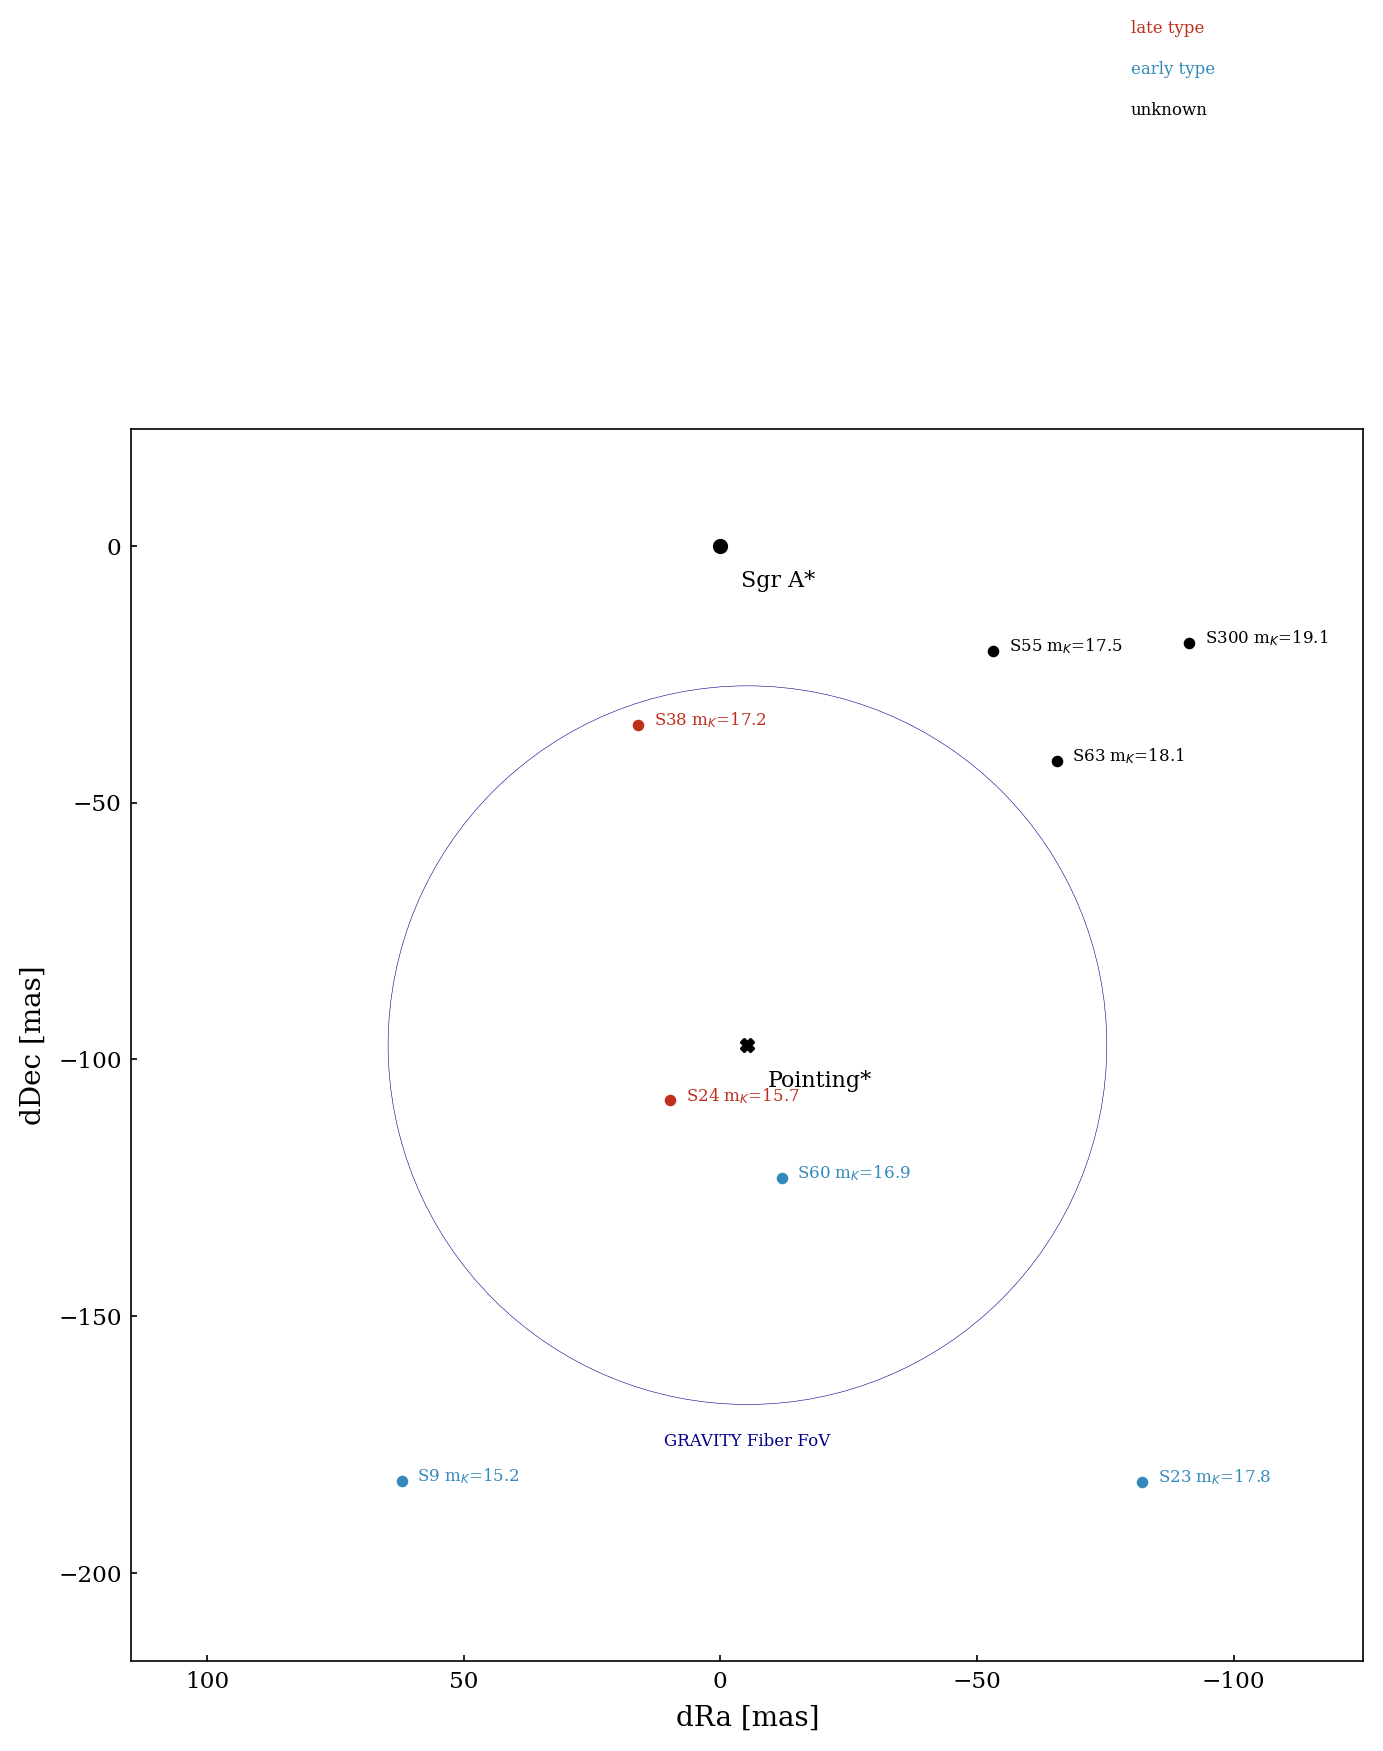

In [34]:
o.plot_orbits(t=date, long=True, off=off)

**-> S60 and S24 in the field**

Now we have two sources and no black hole. The code will assume the central source as the black hole and the other star as the primary star

In [39]:
t = gp.convert_date(date)[0]

# get positions
s60 = o.pos_orbit('S60', t)*1e3
s24 = o.pos_orbit('S24', t)*1e3
sep = s60 - s24

# get flux ratios, always relative to brightest star in field (here: S38)
s60s24 = 10**(-0.4*(o.star_orbits['S60']['Kmag'] - o.star_orbits['S24']['Kmag']))

# Phase center is distance from pointing to central sourse
pc = s24 - np.array(off)

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|██████████████████████████████████████████████████████████████████| 201/201 [00:34<00:00,  5.83it/s]


---------------------------------------
Mean acceptance fraction: 0.45
---------------------------------------


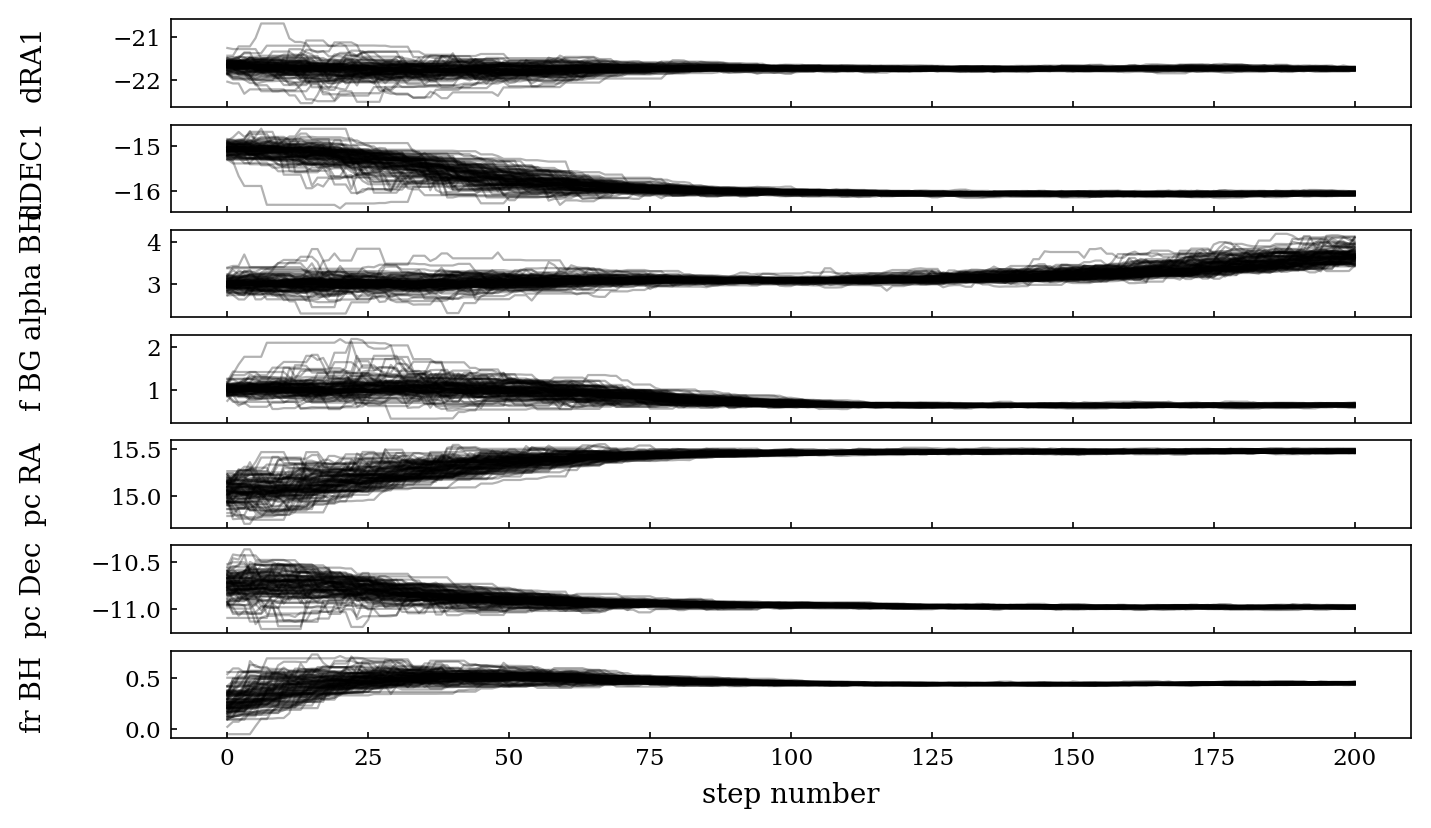



ndof: 53
red. chi2 for visamp: 6.41
red. chi2 for vis2: 7.31
red. chi2 for visphi: 3.20
red. chi2 for closure: 1.92


-----------------------------------
Best chi2 result:
dRA1 = -21.722
dDEC1 = -16.065
alpha BH = 3.924
f BG = 0.630
pc RA = 15.474
pc Dec = -10.977
fr BH = 0.441


MCMC Result:
dRA1 = -21.737 + 0.027 - 0.028
dDEC1 = -16.048 + 0.026 - 0.029
alpha BH = 3.235 + 0.300 - 0.135
f BG = 0.633 + 0.025 - 0.024
pc RA = 15.472 + 0.012 - 0.011
pc Dec = -10.974 + 0.012 - 0.010
fr BH = 0.439 + 0.007 - 0.007
-----------------------------------
Run MCMC for Pol 2


/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1823: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|██████████████████████████████████████████████████████████████████| 201/201 [00:34<00:00,  5.88it/s]


---------------------------------------
Mean acceptance fraction: 0.44
---------------------------------------


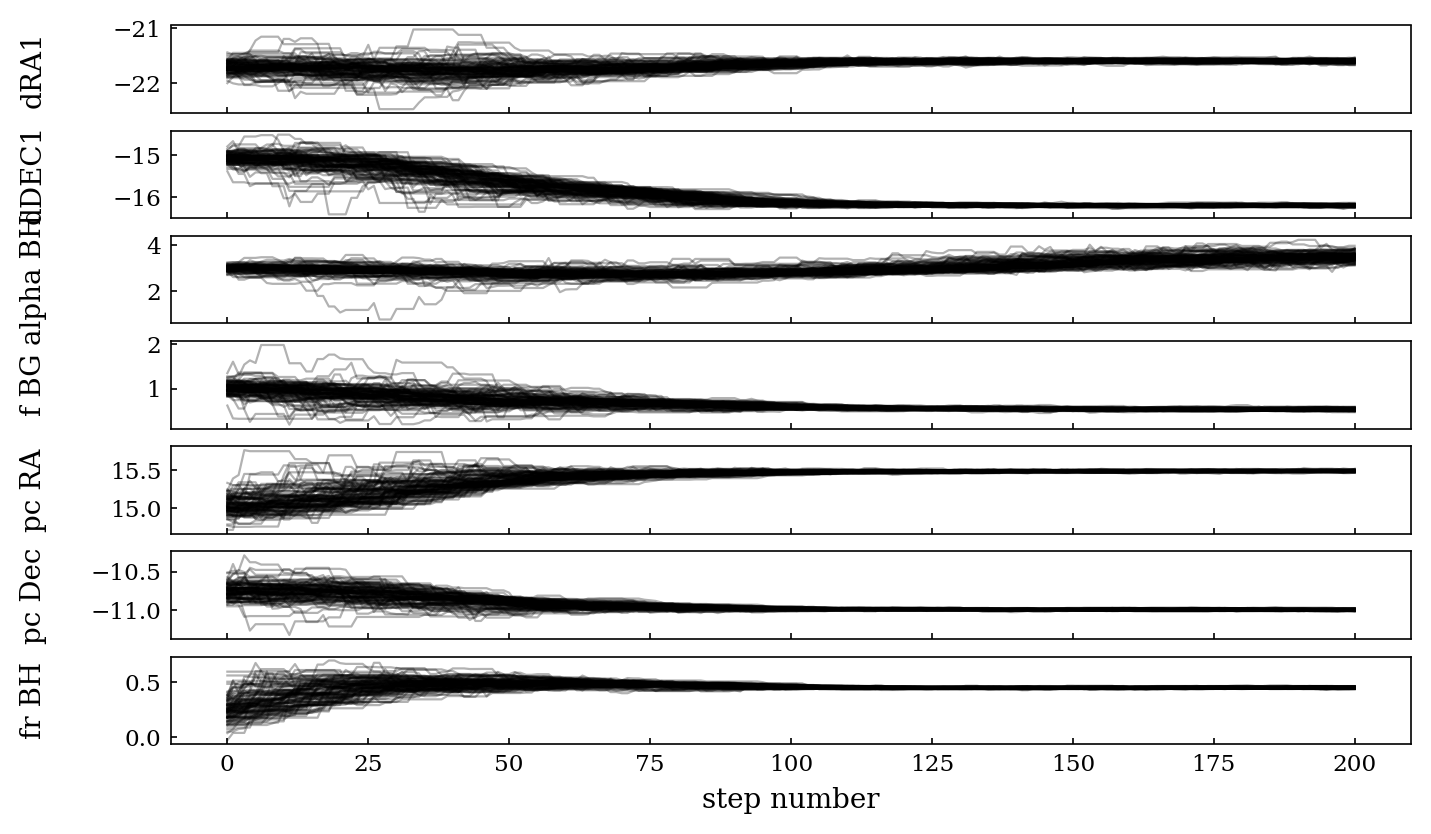



ndof: 53
red. chi2 for visamp: 5.10
red. chi2 for vis2: 5.84
red. chi2 for visphi: 3.97
red. chi2 for closure: 2.64


-----------------------------------
Best chi2 result:
dRA1 = -21.587
dDEC1 = -16.186
alpha BH = 3.624
f BG = 0.539
pc RA = 15.493
pc Dec = -11.001
fr BH = 0.453


MCMC Result:
dRA1 = -21.595 + 0.026 - 0.032
dDEC1 = -16.186 + 0.027 - 0.023
alpha BH = 3.200 + 0.306 - 0.297
f BG = 0.547 + 0.028 - 0.025
pc RA = 15.485 + 0.012 - 0.013
pc Dec = -10.996 + 0.009 - 0.008
fr BH = 0.450 + 0.007 - 0.006
-----------------------------------


/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1823: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


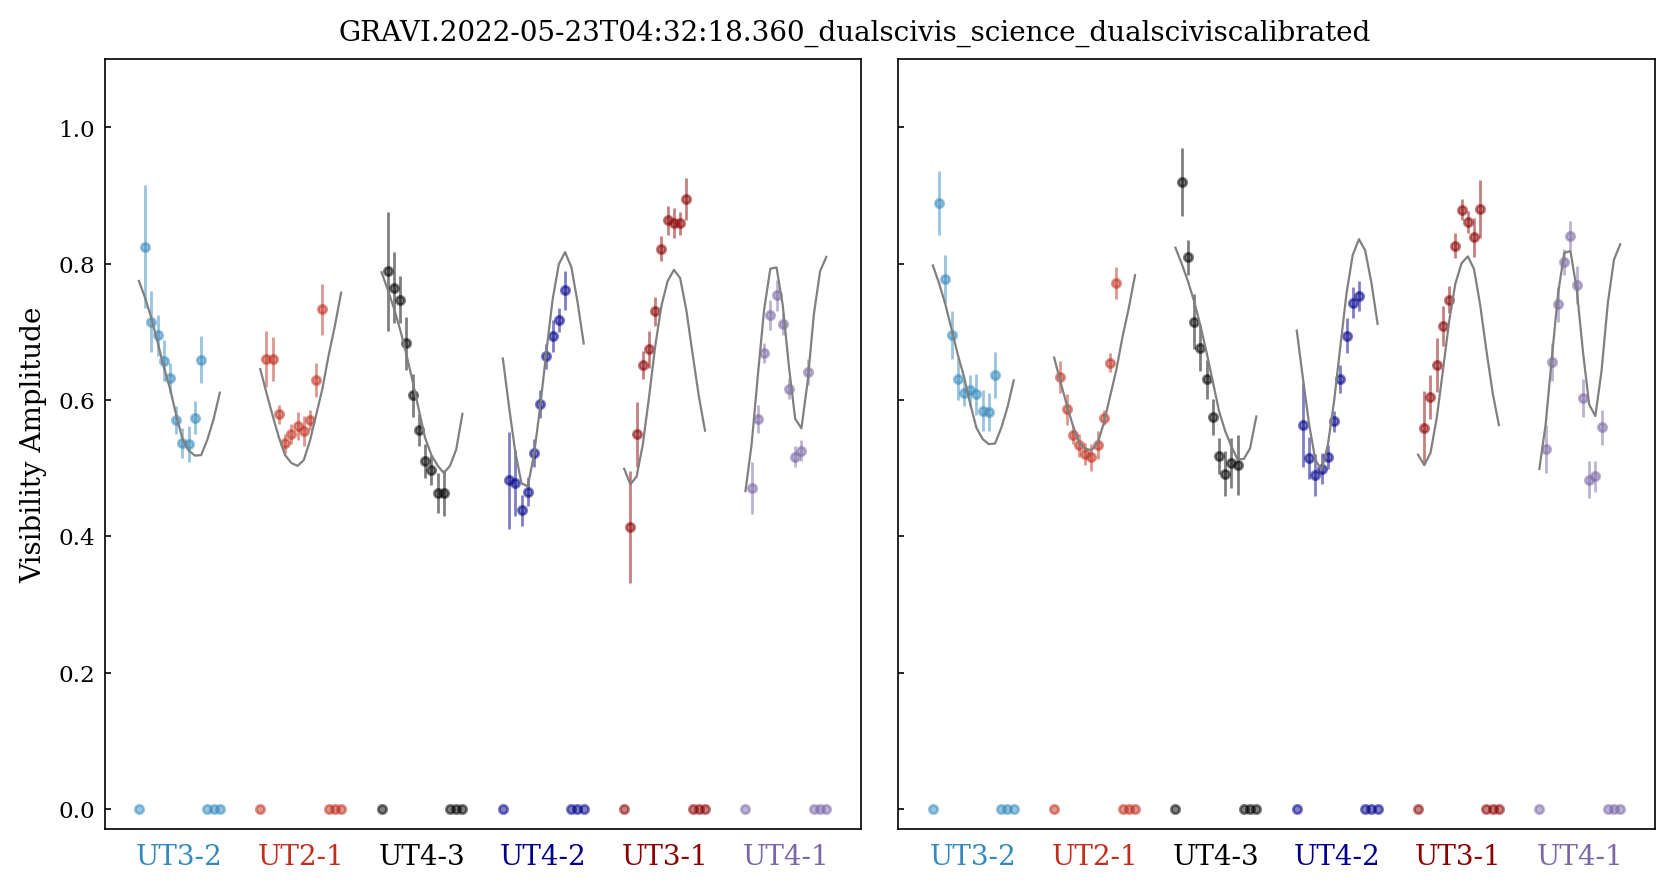

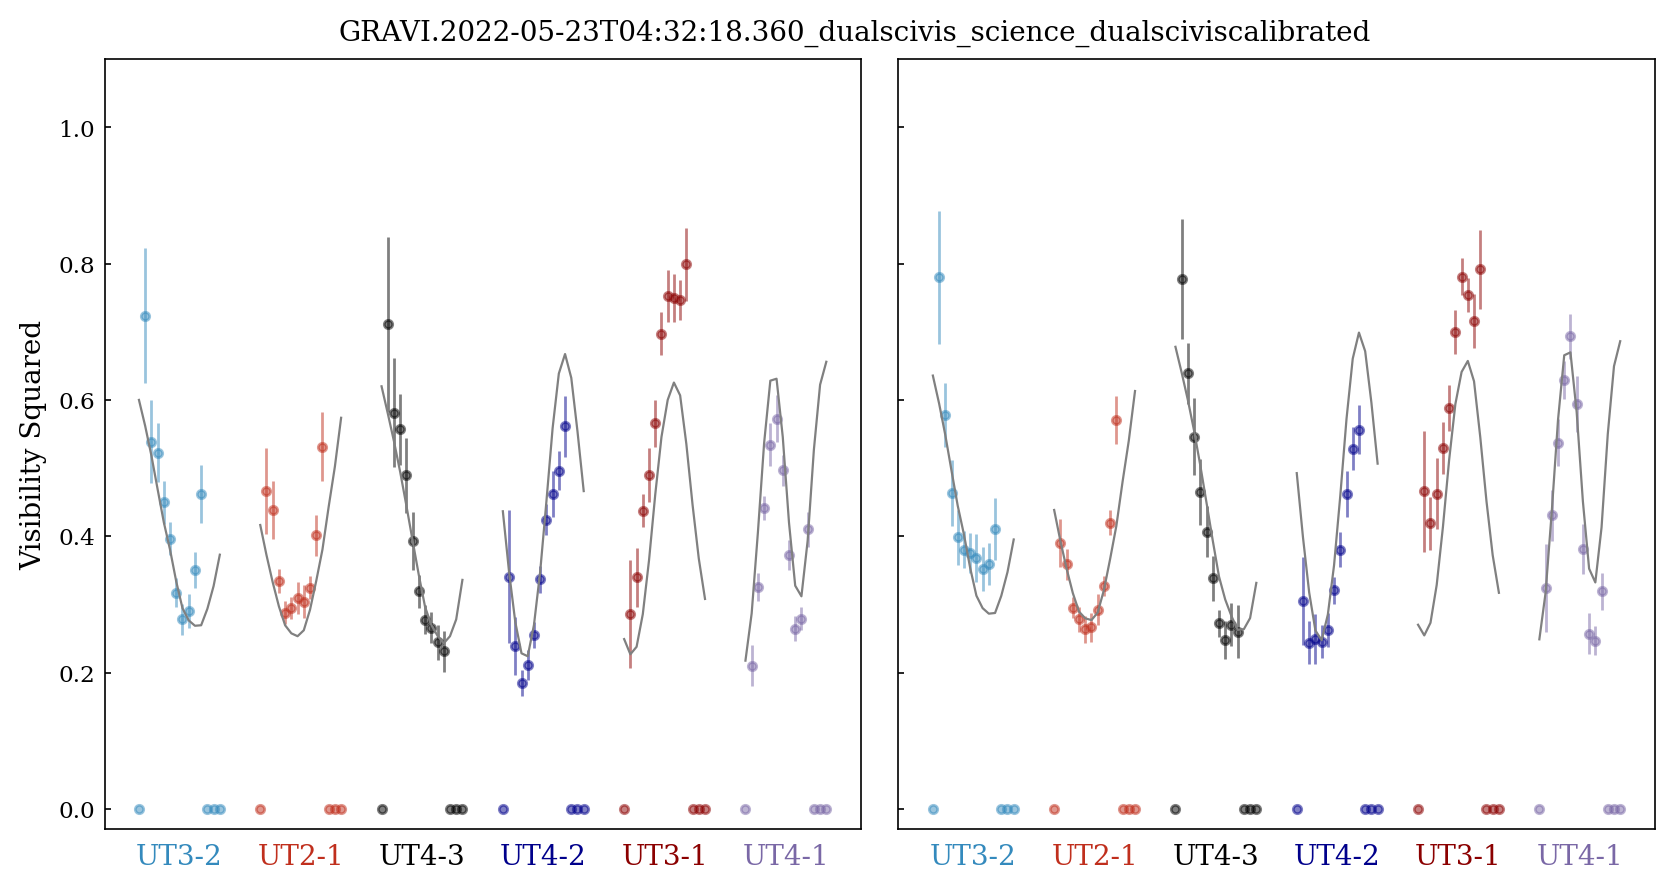

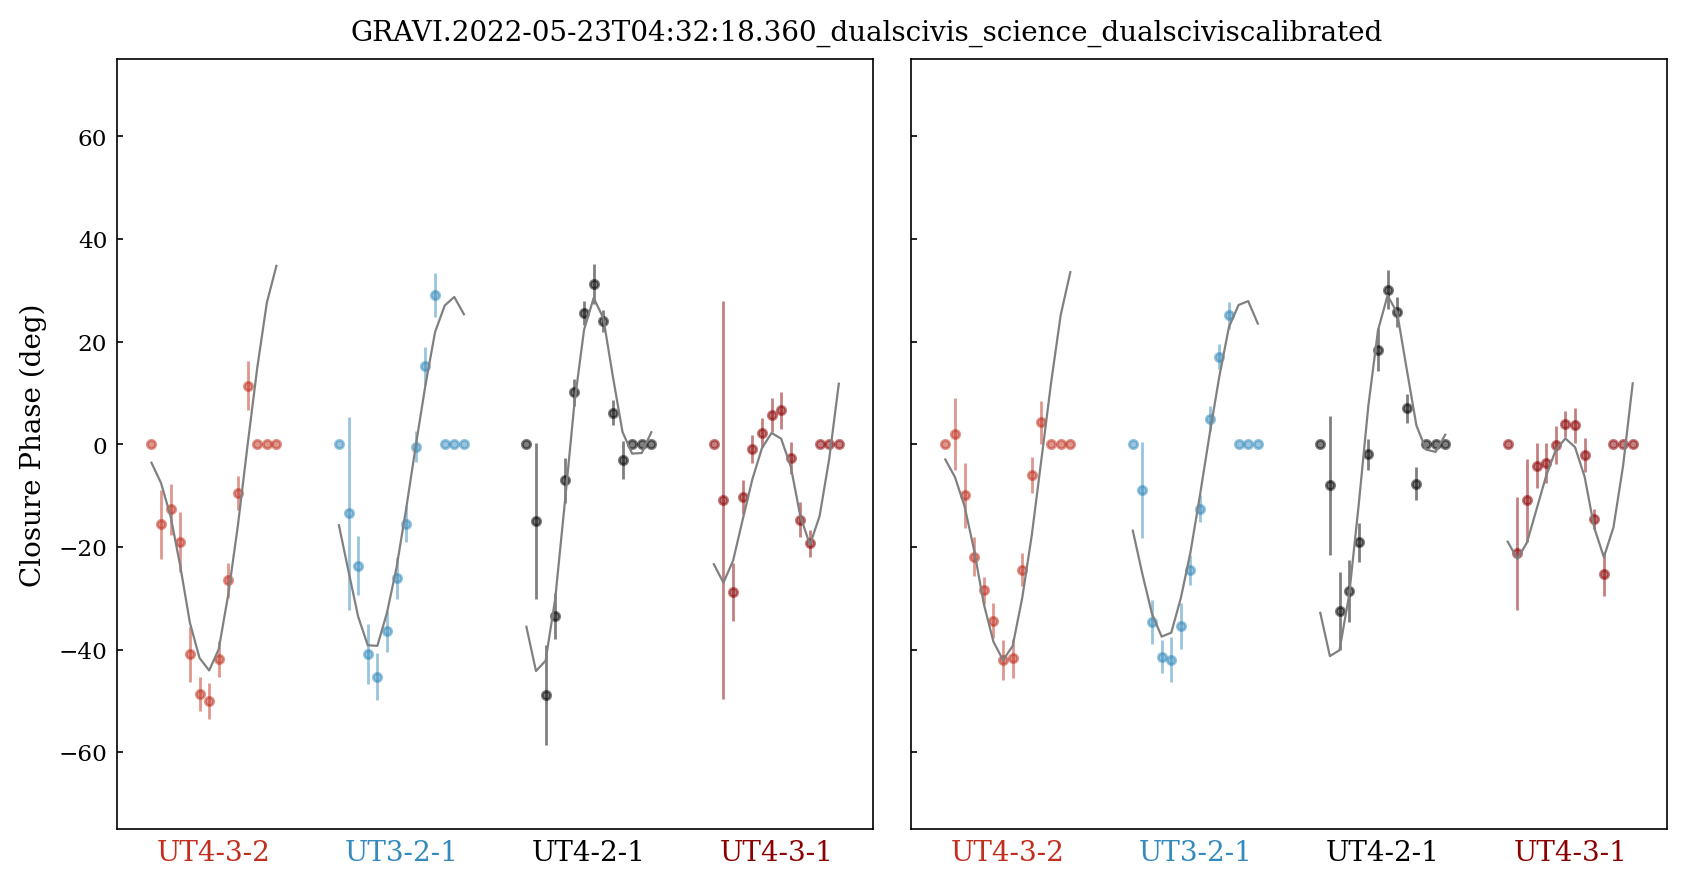

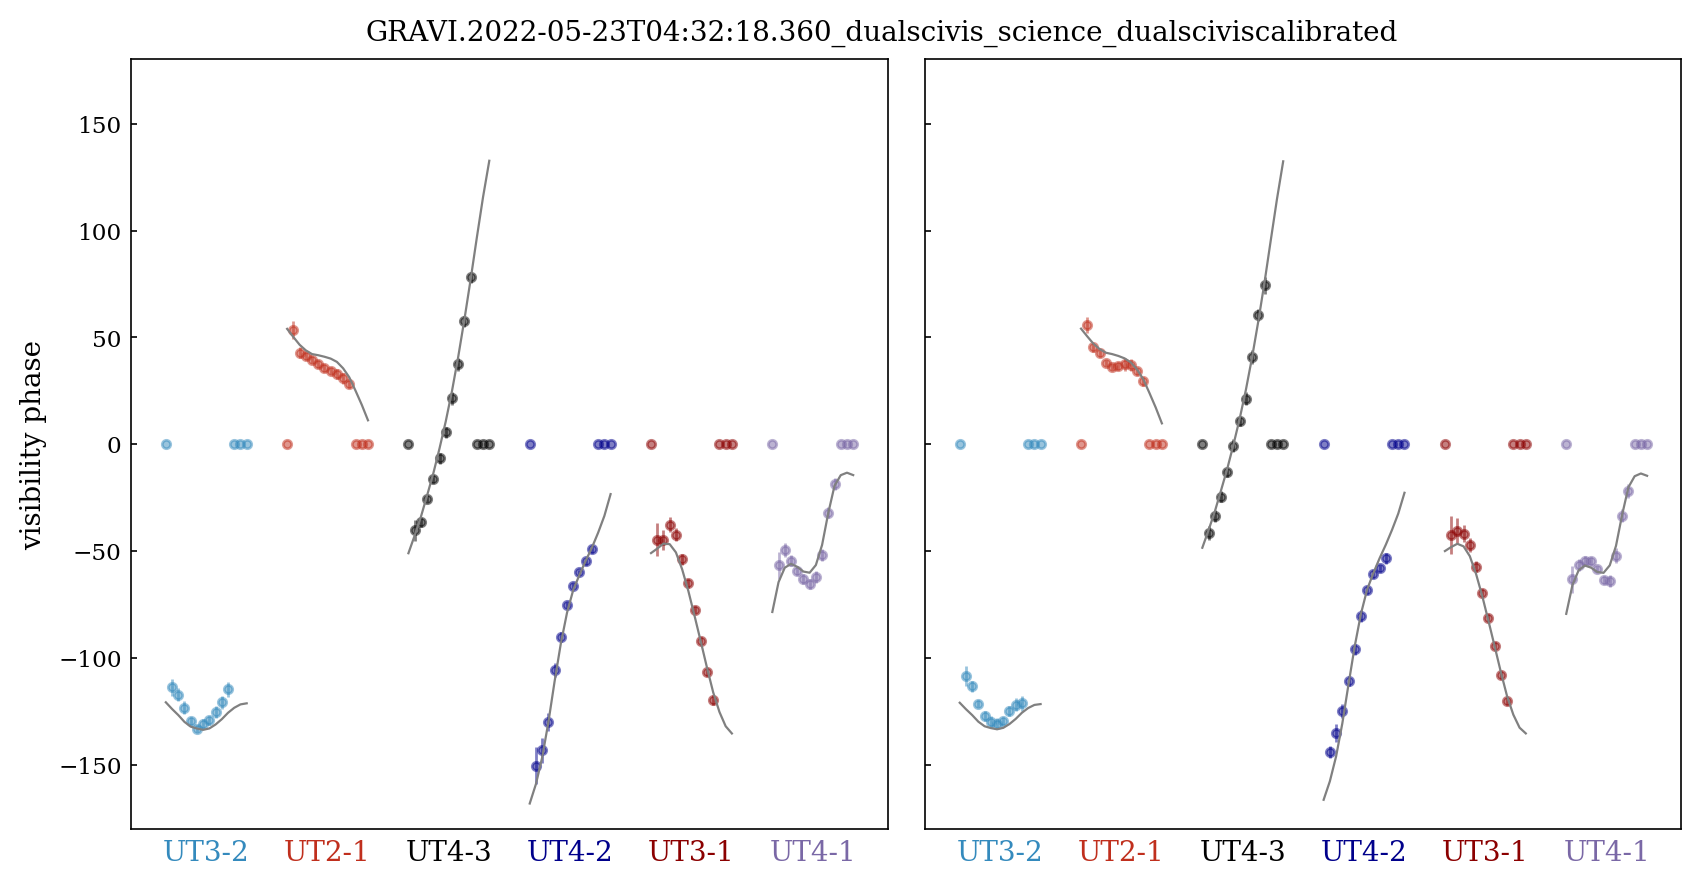

Combined red. chi2 of fitted data: 36.389


[array([-21.72216296, -16.06514333,   3.92379547,   0.62960661,
         15.47441293, -10.97666485,   0.44079563]),
 array([-21.5868811 , -16.18636355,   3.62432558,   0.53927895,
         15.49251174, -11.00102054,   0.45301542])]

In [41]:
star_pos_ra = [sep[0]]  # list of RA of stars
star_pos_de = [sep[1]]  # list of Dec of stars
star_flux_ratio = []      # list of flux ratios relativ to first star, 1 shorter than other lists

fi = gp.GravMFit(f)
fi.fit_stars(
    star_pos_ra,
    star_pos_de,
    star_flux_ratio,
    fit_for=[1,1,1,1], # fitting for all quantities here: VisAmp, V2, Closure Phase, & Visibility Phase
    nthreads=4,
    nwalkers=101,
    nruns=201,
    initial=[3, 1,     # initial conditions for: alpha SgrA*, background flux ratio
             *pc,     # initial conditions for: Phase center Ra, Dec
             s29s42 , 1], # initial conditions for: background central/primary source, coherence loss
    plotScience=True,
    plotCorner='steps')

In [42]:
fi.fittab

,column,dRA1,dDEC1,alpha BH,f BG,pc RA,pc Dec,fr BH,CL1,CL2,CL3,CL4,CL5,CL6,chi2
0,in P0_0,-21.688346,-15.074285,3.000000,1.000000,15.054836,-10.750057,0.225294,1.0,1.0,1.0,1.0,1.0,1.0,6.409314
1,M.L. P0_0,-21.722163,-16.065143,3.923795,0.629607,15.474413,-10.976665,0.440796,1.0,1.0,1.0,1.0,1.0,1.0,7.312564
2,M.P. P0_0,-21.736666,-16.047978,3.234537,0.633053,15.472475,-10.974207,0.438862,1.0,1.0,1.0,1.0,1.0,1.0,1.915489
3,$-\sigma$ P0_0,0.027718,0.028649,0.135040,0.023695,0.011420,0.009931,0.006783,0.0,0.0,0.0,0.0,0.0,0.0,3.203290
4,$+\sigma$ P0_0,0.027466,0.026142,0.300011,0.024980,0.012342,0.012269,0.006950,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,in P1_0,-21.688346,-15.074285,3.000000,1.000000,15.054836,-10.750057,0.225294,1.0,1.0,1.0,1.0,1.0,1.0,5.104394
6,M.L. P1_0,-21.586881,-16.186364,3.624326,0.539279,15.492512,-11.001021,0.453015,1.0,1.0,1.0,1.0,1.0,1.0,5.839500
7,M.P. P1_0,-21.595104,-16.185807,3.199542,0.547337,15.484950,-10.995752,0.450275,1.0,1.0,1.0,1.0,1.0,1.0,2.637149
8,$-\sigma$ P1_0,0.031561,0.023306,0.297229,0.024715,0.012587,0.007805,0.006245,0.0,0.0,0.0,0.0,0.0,0.0,3.967625
9,$+\sigma$ P1_0,0.026330,0.027087,0.305780,0.027698,0.011508,0.009369,0.007054,0.0,0.0,0.0,0.0,0.0,0.0,NaN
